[//]: # ( Finnish Horticultural Weather Analysis )

[//]: # ( License: MIT License )

[//]: # ( Repository: https://github.com/outobecca/botanical-colabs )

# 🇫🇮 Finnish Horticultural Weather Analysis
**Version 1.0** | Created: 2025-11-04 | Suomeksi / In Finnish

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/outobecca/botanical-colabs/blob/main/notebooks/finnish_weather_analysis.ipynb)

## 📋 Yleiskatsaus / Overview

**Tarkoitus / Purpose:** Analysoi Suomen ilmastotietoja puutarhatuotannon näkökulmasta käyttäen FMI:n (Ilmatieteen laitos) avointa dataa.

**Purpose:** Analyze Finnish weather data for horticultural applications using FMI (Finnish Meteorological Institute) open data.

### 🎯 Käyttötapaukset / Use Cases
- 🌡️ Lämpötila-analyysi kasvukaudelle / Growing season temperature analysis
- 💧 Sadanta ja kastelutarpeen arviointi / Precipitation and irrigation needs
- ❄️ Hallariski ja suoja-aika / Frost risk and protection timing
- ☀️ Auringonpaiste ja valoanalyysi / Sunshine and light analysis
- 📊 Kasvukauden pituuden seuranta / Growing season length tracking
- 🌱 Optimaalinen kylvöaika / Optimal planting time

### 📡 Tietolähteet / Data Sources

| Lähde / Source | Tyyppi / Type | Kuvaus / Description |
|----------------|---------------|---------------------|
| **FMI Open Data** | Avoin / Open | Sääasemat, historialliset tiedot / Weather stations, historical data |
| **FMI API** | REST API | Reaaliaikainen data / Real-time data |
| **Sample Data** | Esimerkki / Example | Testidataa / Test data |

### 🔑 API-avain / API Key

FMI Open Data is free and open (no API key required):
- 📖 Documentation: https://www.ilmatieteenlaitos.fi/avoin-data-avattavat-aineistot
- 🌐 WFS Service: https://opendata.fmi.fi/wfs
- 🗺️ WMS Service: https://openwms.fmi.fi/geoserver/wms

### ⚠️ Huomautukset / Notes
- FMI data is free for non-commercial use
- Weather station locations across Finland
- Historical data available from 1959
- Real-time updates every hour


### FMI Open Data API

FMI (Ilmatieteen laitos) tarjoaa kattavaa säädataa / FMI provides comprehensive weather data:

**Web Services:**
- **WFS (Web Feature Service)**: Weather observations and forecasts
  - Base URL: https://opendata.fmi.fi/wfs
  - GetCapabilities: https://opendata.fmi.fi/wfs?service=WFS&version=2.0.0&request=GetCapabilities
- **WMS (Web Map Service)**: Weather maps and radar
  - Base URL: https://openwms.fmi.fi/geoserver/wms
  - GetCapabilities: https://openwms.fmi.fi/geoserver/wms?request=GetCapabilities

**Data Available:**
- 150+ weather stations across Finland
- Temperature, precipitation, wind, snow depth
- Historical data from 1959
- Hourly and daily observations
- Forecasts and warnings

**No API key required** - All data is freely available under CC BY 4.0 license.

For detailed information, see: https://www.ilmatieteenlaitos.fi/avoin-data-avattavat-aineistot


## ⚙️ Vaihe 1: Asennus / Step 1: Installation


In [14]:
# ============================================================================
# Library Import
# ============================================================================
"""Import required libraries for FMI data access and analysis.
Tuodaan tarvittavat kirjastot FMI-datan käyttöön.

NOTE: If you need to install packages, run this in a terminal:
pip install pandas numpy matplotlib seaborn requests ipywidgets
"""

# Imports
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import xml.etree.ElementTree as ET
from datetime import datetime, timedelta

# Colab detection (for compatibility)
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Styling
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

print("✅ Kirjastot ladattu / Libraries loaded")
print(f"📦 pandas {pd.__version__}, numpy {np.__version__}, matplotlib {plt.matplotlib.__version__}")
print(f"🌍 Environment: {'Google Colab' if IN_COLAB else 'Local/Jupyter'}")

✅ Kirjastot ladattu / Libraries loaded
📦 pandas 2.3.3, numpy 2.3.4, matplotlib 3.10.7
🌍 Environment: Local/Jupyter


## 🔧 Vaihe 2: Asetukset / Step 2: Configuration

Use the interactive form below to configure your analysis / Käytä alla olevaa lomaketta analyysin määrittämiseen.


In [15]:
# ============================================================================
# Configuration and API Setup with Enhanced Controls
# ============================================================================

# FMI Open Data does not require an API key
# All data is freely available under CC BY 4.0 license
FMI_WFS_URL = "https://opendata.fmi.fi/wfs"
FMI_WMS_URL = "https://openwms.fmi.fi/geoserver/wms"

print("🌡️ FMI Open Data - Finnish Horticultural Weather Analysis")
print("=" * 70)
print(f"📡 WFS API: {FMI_WFS_URL}")
print(f"🗺️  WMS API: {FMI_WMS_URL}")
print(f"📖 Docs: https://www.ilmatieteenlaitos.fi/avoin-data")
print("=" * 70)

# ============================================================================
# WEATHER STATION SELECTION / SÄÄASEMAN VALINTA
# ============================================================================

print("\n🌡️ VALITSE SÄÄASEMA / SELECT WEATHER STATION:")
print("=" * 70)
print("  [1] 🏛️  Helsinki Kaisaniemi (Etelä-Suomi / Southern Finland)")
print("  [2] 🌾 Jokioinen (Puutarhatutkimusasema / Horticultural Research)")
print("  [3] 🏝️  Turku (Lounais-Suomi / Southwest Finland)")
print("  [4] 🏭 Tampere (Pirkanmaa)")
print("  [5] 🌳 Lepaa (Puutarhaoppilaitos / Horticultural School)")
print("  [6] 🏞️  Kangasala (Pirkanmaa)")
print("  [7] 🏔️  Jyväskylä (Keski-Suomi / Central Finland)")
print("  [8] 🌊 Oulu (Pohjois-Pohjanmaa / Northern Ostrobothnia)")
print("  [9] ❄️  Rovaniemi (Lappi / Lapland)")
print(" [10] 🔧 Custom location / Oma sijainti (anna koordinaatit)")
print(" [11] 📊 Use sample data / Käytä esimerkkidataa")
print("=" * 70)

station_choice = input("➤ Valinta / Choice (1-11) [default: 2]: ").strip() or "2"

# Extended station data with historical GDD averages and growing zones
stations = {
    "1": {
        "name": "Helsinki Kaisaniemi",
        "fmisid": "100971",
        "lat": 60.18,
        "lon": 24.94,
        "zone": "I (Etelärannikko)",
        "avg_gdd": 1400,
        "growing_days": 180,
    },
    "2": {
        "name": "Jokioinen",
        "fmisid": "101104",
        "lat": 60.81,
        "lon": 23.50,
        "zone": "I-II (Sisämaa)",
        "avg_gdd": 1350,
        "growing_days": 175,
    },
    "3": {
        "name": "Turku",
        "fmisid": "100949",
        "lat": 60.52,
        "lon": 22.26,
        "zone": "I (Lounainen saaristo)",
        "avg_gdd": 1380,
        "growing_days": 178,
    },
    "4": {
        "name": "Tampere",
        "fmisid": "101118",
        "lat": 61.41,
        "lon": 23.60,
        "zone": "II (Sisämaa)",
        "avg_gdd": 1250,
        "growing_days": 165,
    },
    "5": {
        "name": "Lepaa",
        "fmisid": "101267",
        "lat": 61.23,
        "lon": 24.25,
        "zone": "II (Pirkanmaa)",
        "avg_gdd": 1280,
        "growing_days": 168,
    },
    "6": {
        "name": "Kangasala",
        "fmisid": "101256",
        "lat": 61.46,
        "lon": 24.08,
        "zone": "II (Pirkanmaa)",
        "avg_gdd": 1240,
        "growing_days": 163,
    },
    "7": {
        "name": "Jyväskylä",
        "fmisid": "101339",
        "lat": 62.40,
        "lon": 25.67,
        "zone": "III (Keski-Suomi)",
        "avg_gdd": 1150,
        "growing_days": 155,
    },
    "8": {
        "name": "Oulu",
        "fmisid": "101799",
        "lat": 65.03,
        "lon": 25.47,
        "zone": "IV (Pohjois-Pohjanmaa)",
        "avg_gdd": 950,
        "growing_days": 140,
    },
    "9": {
        "name": "Rovaniemi",
        "fmisid": "101917",
        "lat": 66.56,
        "lon": 25.83,
        "zone": "V (Lappi)",
        "avg_gdd": 800,
        "growing_days": 120,
    },
    "10": {
        "name": "Custom Location",
        "fmisid": "CUSTOM",
        "lat": 0.0,
        "lon": 0.0,
        "zone": "Custom",
        "avg_gdd": 1200,
        "growing_days": 160,
    },
    "11": {
        "name": "Sample Data",
        "fmisid": "SAMPLE",
        "lat": 60.81,
        "lon": 23.50,
        "zone": "I-II (Simuloitu)",
        "avg_gdd": 1350,
        "growing_days": 175,
    },
}

selected_station = stations[station_choice]
USE_SAMPLE_DATA = station_choice == "11"

# Handle custom location input
if station_choice == "10":
    print("\n🔧 CUSTOM LOCATION / OMA SIJAINTI:")
    print("=" * 70)
    custom_name = input("   Sijainnin nimi / Location name [Custom]: ").strip() or "Custom"
    
    lat_str = input("   Leveysaste / Latitude (e.g., 61.46) [61.0]: ").strip() or "61.0"
    lon_str = input("   Pituusaste / Longitude (e.g., 24.08) [24.0]: ").strip() or "24.0"
    
    selected_station["name"] = custom_name
    selected_station["lat"] = float(lat_str)
    selected_station["lon"] = float(lon_str)
    
    # Estimate zone based on latitude
    if selected_station["lat"] < 60.5:
        selected_station["zone"] = "I (Etelä-Suomi)"
        selected_station["avg_gdd"] = 1380
        selected_station["growing_days"] = 178
    elif selected_station["lat"] < 62.0:
        selected_station["zone"] = "II (Sisämaa)"
        selected_station["avg_gdd"] = 1250
        selected_station["growing_days"] = 165
    elif selected_station["lat"] < 64.0:
        selected_station["zone"] = "III (Keski-Suomi)"
        selected_station["avg_gdd"] = 1150
        selected_station["growing_days"] = 155
    elif selected_station["lat"] < 66.0:
        selected_station["zone"] = "IV (Pohjois-Pohjanmaa)"
        selected_station["avg_gdd"] = 950
        selected_station["growing_days"] = 140
    else:
        selected_station["zone"] = "V (Lappi)"
        selected_station["avg_gdd"] = 800
        selected_station["growing_days"] = 120
    
    print(f"\n   ℹ️  Arvioitu vyöhyke leveysasteen perusteella")
    print(f"   ℹ️  Estimated zone based on latitude")

print(f"\n✅ Valittu asema / Selected Station:")
print(f"   📍 {selected_station['name']}")
print(
    f"   🌍 Sijainti / Location: {selected_station['lat']:.2f}°N, {selected_station['lon']:.2f}°E"
)
print(f"   🗺️  Vyöhyke / Zone: {selected_station['zone']}")
print(f"   📈 Keskimääräinen GDD / Avg GDD: ~{selected_station['avg_gdd']}")
print(f"   📅 Kasvukausi / Growing days: ~{selected_station['growing_days']} päivää")

# ============================================================================
# TIME PERIOD SELECTION / AJANJAKSON VALINTA
# ============================================================================

print("\n📅 AIKAJAKSO / TIME PERIOD:")
print("=" * 70)
print("  [1] 📆 Last 30 days / Viimeiset 30 päivää")
print("  [2] 📅 Current year / Kuluva vuosi (1.1 - tänään)")
print("  [3] 🌱 Growing season 2024 (1.5 - 30.9)")
print("  [4] 🌾 Full year 2024 (1.1 - 31.12)")
print("  [5] ❄️  Winter season 2023-2024 (1.12.2023 - 28.2.2024)")
print("  [6] 🔧 Custom period / Oma aikajakso")
print("=" * 70)

period_choice = input("➤ Valinta / Choice (1-6) [default: 3]: ").strip() or "3"

if period_choice == "1":
    end_date = datetime.now()
    start_date = end_date - timedelta(days=30)
elif period_choice == "2":
    start_date = datetime(datetime.now().year, 1, 1)
    end_date = datetime.now()
elif period_choice == "3":
    start_date = datetime(2024, 5, 1)
    end_date = datetime(2024, 9, 30)
elif period_choice == "4":
    start_date = datetime(2024, 1, 1)
    end_date = datetime(2024, 12, 31)
elif period_choice == "5":
    start_date = datetime(2023, 12, 1)
    end_date = datetime(2024, 2, 28)
else:
    print("\n🔧 Anna oma aikajakso / Enter custom period:")
    start_str = input("   Alkupäivä / Start date (YYYY-MM-DD) [2024-05-01]: ").strip() or "2024-05-01"
    end_str = input("   Loppupäivä / End date (YYYY-MM-DD) [2024-09-30]: ").strip() or "2024-09-30"
    start_date = datetime.strptime(start_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_str, "%Y-%m-%d")

print(f"\n✅ Aikajakso / Period:")
print(
    f"   📅 {start_date.strftime('%d.%m.%Y')} - {end_date.strftime('%d.%m.%Y')}"
)
print(f"   ⏱️  Päiviä / Days: {(end_date - start_date).days + 1}")

# ============================================================================
# THERMAL SUM CONFIGURATION / LÄMPÖSUMMAN ASETUKSET
# ============================================================================

print("\n🌡️ LÄMPÖSUMMAN LASKENTA / THERMAL SUM CALCULATION:")
print("=" * 70)
print("  [1] 📊 GDD Base 5°C (Kasvuastepäivät - standard)")
print("  [2] 📊 GDD Base 10°C (Lämpövaativille kasveille)")
print("  [3] 📊 Thermal Sum 0°C (Lämpösumma)")
print("  [4] 📊 Both GDD5 + Thermal Sum (Molemmat)")
print("=" * 70)

thermal_choice = input("➤ Valinta / Choice (1-4) [default: 1]: ").strip() or "1"

# Configure thermal calculation parameters
if thermal_choice == "1":
    thermal_methods = ["gdd5"]
    print("✅ Lasketaan: GDD (base 5°C)")
elif thermal_choice == "2":
    thermal_methods = ["gdd10"]
    print("✅ Lasketaan: GDD (base 10°C)")
elif thermal_choice == "3":
    thermal_methods = ["thermal_sum"]
    print("✅ Lasketaan: Lämpösumma (base 0°C)")
else:
    thermal_methods = ["gdd5", "thermal_sum"]
    print("✅ Lasketaan: GDD (base 5°C) + Lämpösumma (base 0°C)")

# ============================================================================
# HISTORICAL COMPARISON / HISTORIALLINEN VERTAILU
# ============================================================================

print("\n📊 HISTORIALLINEN VERTAILU / HISTORICAL COMPARISON:")
print("=" * 70)
print("  [1] ✅ Yes - Compare with station averages / Kyllä - Vertaa keskiarvoihin")
print("  [2] ❌ No - Current period only / Ei - Vain nykyinen jakso")
print("=" * 70)

compare_choice = input("➤ Valinta / Choice (1-2) [default: 1]: ").strip() or "1"
use_historical_comparison = compare_choice == "1"

if use_historical_comparison:
    print(f"✅ Vertaillaan historiallisiin keskiarvoihin")
    print(f"   📈 Aseman keskimääräinen GDD: {selected_station['avg_gdd']}")
    print(f"   📅 Keskimääräinen kasvukausi: {selected_station['growing_days']} päivää")
else:
    print("✅ Ei historiallista vertailua")

# ============================================================================
# FINNISH GARDENING CALENDAR / SUOMALAINEN PUUTARHAKALENTERI
# ============================================================================

print("\n🗓️ FENOLOGISET MERKKIPÄIVÄT / PHENOLOGICAL CALENDAR EVENTS:")
print("=" * 70)

# Finnish gardening calendar events (phenological)
finnish_calendar_events = {
    # Spring / Kevät
    "early_spring": {
        "name": "Varhaiskevät / Early Spring",
        "marker": "Jouluruusu kukkii / Christmas rose blooms",
        "period": "Maaliskuun loppu - huhtikuun alku / Late March - Early April",
        "temp_threshold": "Vuorokauden keskilämpötila > 0°C",
        "activities": [
            "Hedelmäpuiden ja pensaiden leikkaus",
            "Esikasvatuksen aloitus sisällä",
            "Odotellaan roudan sulamista"
        ]
    },
    "mid_spring": {
        "name": "Keskikevät / Mid Spring",
        "marker": "Sinivuokko kukkii / Hepatica blooms",
        "period": "Huhtikuu / April",
        "temp_threshold": "Vuorokauden keskilämpötila > +5°C (Terminen kasvukausi alkaa)",
        "soil_temp": "Maan lämpötila ~8°C",
        "activities": [
            "Ensimmäiset kylvöt avomaalle (porkkana, persilja, pinaatti)",
            "Sipulin istutus",
            "Ankaran siivoamisen aika"
        ]
    },
    "late_spring": {
        "name": "Sydänkevät / Late Spring",
        "marker": "Vaahtera kukkii / Maple blooms",
        "period": "Toukokuun puoliväli / Mid-May",
        "temp_threshold": "Vuorokauden keskilämpötila > +10°C (Terminen kesä alkaa)",
        "activities": [
            "Aikaisen perunan istutus",
            "Mangoldin ja punajuuren kylvö",
            "Taimien karaiseminen alkaa",
            "Hallariski vielä olemassa!"
        ]
    },
    
    # Summer / Kesä
    "early_summer": {
        "name": "Alkukesä / Early Summer",
        "marker": "Pihasyreeni kukkii / Lilac blooms",
        "period": "Touko-kesäkuun vaihde / Late May - Early June",
        "temp_threshold": "Hallanvaara väistyy (yleensä ~1.6. jälkeen)",
        "activities": [
            "Hallanarkojen kasvien istutus (tomaatti, kurkku, papu)",
            "Samettikukka, kurpitsa, maissi",
            "Rikkaruohojen kitkeminen",
            "Porkkanan ja palsternakan harvennus"
        ]
    },
    "mid_summer": {
        "name": "Keskikesä / Mid Summer",
        "marker": "Kurjenpolvien aika / Geranium time",
        "period": "Kesäkuu - heinäkuun alku / June - Early July",
        "date_markers": ["Juhannus / Midsummer (24.6.)", "Pietarin päivä (29.6.) - nauriin kylvö"],
        "activities": [
            "Nauriin kylvö Pietarin päivänä (29.6.)",
            "Aasialaisten vihannesten kylvö (lyhyen päivän suosijat)",
            "Kaksivuotisten kukkien kylvö",
            "Raparperin satokausi päättyy",
            "Yrttien kerääminen ennen kukintaa"
        ]
    },
    "late_summer": {
        "name": "Loppukesä / Late Summer",
        "marker": "Kesäomenat kypsyvät / Summer apples ripen",
        "period": "Heinäkuun loppu - elokuu / Late July - August",
        "date_markers": [
            "Ollin päivä (29.7.) - käänne kohti syksyä",
            "Laurin päivä (10.8.) - heinänteon päättyminen",
            "Pärttylin päivä (24.8.) - rukiin kylvö viimeistään"
        ],
        "activities": [
            "Sipulin korjuu (naatit kellastuvat)",
            "Punajuuren korjuu alkaa",
            "Perunan korjuu (ruton välttämiseksi)",
            "Mansikan uudet taimet istutetaan",
            "Viherlannoituksen kylvö"
        ]
    },
    
    # Autumn / Syksy
    "early_autumn": {
        "name": "Ruskasyksy / Early Autumn",
        "marker": "Pihlajanmarjat kypsyvät / Rowan berries ripen",
        "period": "Elo-syyskuu / August-September",
        "temp_threshold": "Vuorokauden keskilämpötila < +10°C (Terminen syksy alkaa)",
        "date_markers": ["Mikkelinpäivä (29.9.) - sadonkorjuun päätepiste (perinteisesti)"],
        "activities": [
            "Juuresten sadonkorjuu",
            "Lehtikaalien kasvu jatkuu",
            "Perennien istutus",
            "Kompostoinnin aloitus"
        ]
    },
    "late_autumn": {
        "name": "Myöhäissyksy / Late Autumn",
        "marker": "Vaahtera on riisuuntunut / Maple has shed leaves",
        "period": "Loka-marraskuu / October-November",
        "temp_threshold": "Vuorokauden keskilämpötila < 0°C (Terminen talvi alkaa)",
        "date_markers": [
            "Loka-marraskuun vaihde - muinaissuomalainen vuodenvaihde",
            "Simon päivä (28.10.) - jakoajan alku",
            "Pyhäinmiesten päivä (1.11.)",
            "Martin päivä (10.11.) - jakoajan loppu"
        ],
        "activities": [
            "Kasvukauden jälkeinen siivous",
            "Pensaiden ja puiden siirtäminen",
            "Talvisuojaus (runkosuojat jyrsijöiltä)",
            "Syyskylvöt: palstarnakka, pinaatti, kirveli, valkosipuli",
            "Kylmäkäsittelyn vaativien siementen kylvö"
        ]
    },
    
    # Winter / Talvi
    "winter": {
        "name": "Talvi / Winter",
        "marker": "Maa jäätyy / Ground freezes",
        "period": "Joulu - maaliskuu / December - March",
        "temp_threshold": "Vuorokauden keskilämpötila < 0°C",
        "activities": [
            "Kasvien talvisuojaus (lumi suojaa, mutta myös painaa)",
            "Jyrsijä- ja lumivaurioiden tarkkailu",
            "Puiden ja pensaiden leikkaus kevättalvella",
            "Esikasvatuksen aloitus maaliskuussa (vihanneskrassi, basilika)"
        ]
    }
}

print("📖 Suomalainen fenologinen puutarhakalenteri ladattu")
print("   9 vuodenaikaa tunnuskasveineen")
print("   Pohjautuu artikkeliin: http://olemmepuutarhassa.fi/puutarhan-vuodenajat/")
print("=" * 70)

print("\n✅ ASETUKSET TALLENNETTU / SETTINGS SAVED!")
print("=" * 70)
print(f"📍 Asema / Station: {selected_station['name']}")
print(f"📅 Aikajakso / Period: {start_date.strftime('%d.%m.%Y')} - {end_date.strftime('%d.%m.%Y')}")
print(f"🌡️ Lämpösumma / Thermal: {', '.join(thermal_methods)}")
print(f"📊 Vertailu / Compare: {'Kyllä / Yes' if use_historical_comparison else 'Ei / No'}")
print("=" * 70)

🌡️ FMI Open Data - Finnish Horticultural Weather Analysis
📡 WFS API: https://opendata.fmi.fi/wfs
🗺️  WMS API: https://openwms.fmi.fi/geoserver/wms
📖 Docs: https://www.ilmatieteenlaitos.fi/avoin-data

🌡️ VALITSE SÄÄASEMA / SELECT WEATHER STATION:
  [1] 🏛️  Helsinki Kaisaniemi (Etelä-Suomi / Southern Finland)
  [2] 🌾 Jokioinen (Puutarhatutkimusasema / Horticultural Research)
  [3] 🏝️  Turku (Lounais-Suomi / Southwest Finland)
  [4] 🏭 Tampere (Pirkanmaa)
  [5] 🌳 Lepaa (Puutarhaoppilaitos / Horticultural School)
  [6] 🏞️  Kangasala (Pirkanmaa)
  [7] 🏔️  Jyväskylä (Keski-Suomi / Central Finland)
  [8] 🌊 Oulu (Pohjois-Pohjanmaa / Northern Ostrobothnia)
  [9] ❄️  Rovaniemi (Lappi / Lapland)
 [10] 🔧 Custom location / Oma sijainti (anna koordinaatit)
 [11] 📊 Use sample data / Käytä esimerkkidataa

✅ Valittu asema / Selected Station:
   📍 Lepaa
   🌍 Sijainti / Location: 61.23°N, 24.25°E
   🗺️  Vyöhyke / Zone: II (Pirkanmaa)
   📈 Keskimääräinen GDD / Avg GDD: ~1280
   📅 Kasvukausi / Growing days:

## 🔧 Vaihe 3: Apufunktiot / Step 3: Helper Functions


In [ ]:
# ============================================================================
# Helper Functions for FMI Data and Analysis
# ============================================================================

# Import necessary libraries
from datetime import datetime, timedelta


def fetch_fmi_weather_data(
    fmisid: str, start_time: datetime, end_time: datetime
) -> pd.DataFrame:
    """
    Fetch weather data from FMI Open Data WFS API.
    Hakee säädatan FMI:n avoimesta WFS-rajapinnasta.

    Args:
        fmisid: FMI station ID
        start_time: Start datetime
        end_time: End datetime

    Returns:
        DataFrame with weather observations
    """
    try:
        # FMI WFS GetFeature request - try multiple stored queries
        wfs_url = "https://opendata.fmi.fi/wfs"
        
        print("📡 Fetching data from FMI WFS API...")
        print(f"   Station FMISID: {fmisid}")
        print(f"   Period: {start_time.strftime('%Y-%m-%d')} to {end_time.strftime('%Y-%m-%d')}")
        
        # Try different stored queries in order of preference
        stored_queries = [
            {
                "id": "fmi::observations::weather::daily::simple",
                "params": "tday,tmin,tmax,rrday,snow",
                "name": "Daily Simple"
            },
            {
                "id": "fmi::observations::weather::daily::timevaluepair",
                "params": "tday,tmin,tmax,rrday,snow",
                "name": "Daily Time-Value Pair"
            },
            {
                "id": "fmi::observations::weather::multipointcoverage",
                "params": "t2m,tmin,tmax,r_1h,snow_aws",
                "name": "Multipointcoverage"
            }
        ]
        
        for query in stored_queries:
            try:
                print(f"\n   Trying stored query: {query['name']}...")
                
                params = {
                    "service": "WFS",
                    "version": "2.0.0",
                    "request": "getFeature",
                    "storedquery_id": query["id"],
                    "fmisid": fmisid,
                    "starttime": start_time.strftime("%Y-%m-%dT00:00:00Z"),
                    "endtime": end_time.strftime("%Y-%m-%dT23:59:59Z"),
                }
                
                # Add parameters if specified
                if query["params"]:
                    params["parameters"] = query["params"]
                
                print(f"   Request URL: {wfs_url}")
                print(f"   Query ID: {query['id']}")
                
                response = requests.get(wfs_url, params=params, timeout=30)
                
                # Check response status
                print(f"   Response status: {response.status_code}")
                
                if response.status_code != 200:
                    print(f"   ⚠️ HTTP {response.status_code}: {response.reason}")
                    continue
                
                response.raise_for_status()
                
                # Check if we got XML
                if not response.content:
                    print("   ⚠️ Empty response received")
                    continue
                
                # Parse XML response
                root = ET.fromstring(response.content)

                # Parse XML response
                root = ET.fromstring(response.content)
                
                # Check for exception reports
                exception = root.find(".//{http://www.opengis.net/ows/1.1}Exception")
                if exception is not None:
                    exception_text = exception.find(".//{http://www.opengis.net/ows/1.1}ExceptionText")
                    error_msg = exception_text.text if exception_text is not None else "Unknown error"
                    print(f"   ⚠️ FMI API error: {error_msg}")
                    continue

                # Define namespaces for XML parsing
                ns = {
                    "wfs": "http://www.opengis.net/wfs/2.0",
                    "gml": "http://www.opengis.net/gml/3.2",
                    "om": "http://www.opengis.net/om/2.0",
                    "wml2": "http://www.opengis.net/waterml/2.0",
                    "target": "http://xml.fmi.fi/namespace/om/atmosphericfeatures/1.1",
                    "swe": "http://www.opengis.net/swe/2.0",
                    "gmlcov": "http://www.opengis.net/gmlcov/1.0",
                }

                # Extract data from XML
                data_dict = {}
                
                # Check which format we got
                member_count = len(root.findall(".//om:OM_Observation", ns))
                coverage_count = len(root.findall(".//gmlcov:GridCoverage", ns))
                
                print(f"   Found {member_count} OM_Observation elements")
                print(f"   Found {coverage_count} GridCoverage elements")

                # Try parsing as time-value pairs (OM_Observation format)
                if member_count > 0:
                    for member in root.findall(".//om:OM_Observation", ns):
                        # Get parameter name
                        observed_property = member.find(".//om:observedProperty", ns)
                        if observed_property is not None:
                            param_url = observed_property.get(
                                "{http://www.w3.org/1999/xlink}href", ""
                            )
                            param_name = param_url.split("/")[-1] if param_url else "unknown"
                        else:
                            continue

                        # Get time-value pairs
                        for point in member.findall(".//wml2:MeasurementTVP", ns):
                            time_elem = point.find(".//wml2:time", ns)
                            value_elem = point.find(".//wml2:value", ns)

                            if time_elem is not None and value_elem is not None:
                                time_str = time_elem.text
                                value_str = value_elem.text

                                if time_str and value_str:
                                    date = pd.to_datetime(time_str).date()

                                    try:
                                        value = float(value_str)
                                    except (ValueError, TypeError):
                                        continue

                                    if date not in data_dict:
                                        data_dict[date] = {}

                                    data_dict[date][param_name] = value
                
                # If we found data, break out of the stored query loop
                if data_dict:
                    print(f"   ✅ Successfully extracted {len(data_dict)} days of data")
                    break
                else:
                    print("   ⚠️ No data extracted from this query")
                    
            except ET.ParseError as e:
                print(f"   ⚠️ XML parsing error: {e}")
                continue
            except Exception as e:
                print(f"   ⚠️ Error with this query: {e}")
                continue

        # Convert to DataFrame
        if not data_dict:
            print("\n❌ No data received from any FMI API query")
            print("   This might be due to:")
            print("   1. Station not having data for this time period")
            print("   2. FMI API service temporarily unavailable")
            print("   3. Network connectivity issues")
            print("\n💡 Suggestions:")
            print("   - Try a different date range (more recent data)")
            print("   - Try a different weather station")
            print("   - Check FMI API status: https://www.ilmatieteenlaitos.fi/avoin-data")
            print("   - Using sample data for demonstration...")
            return None

        df = pd.DataFrame.from_dict(data_dict, orient="index")
        df.index = pd.to_datetime(df.index)
        df = df.sort_index()
        
        print(f"\n✅ Successfully created DataFrame with {len(df)} rows")
        print(f"   Available columns: {', '.join(df.columns)}")

        # Rename columns to match our expected format
        column_mapping = {
            "tday": "temp_avg",
            "tmin": "temp_min",
            "tmax": "temp_max",
            "rrday": "precipitation_mm",
            "snow": "snow_depth_cm",
            "t2m": "temp_avg",  # Alternative naming
            "r_1h": "precipitation_mm",  # Alternative naming
            "snow_aws": "snow_depth_cm",  # Alternative naming
        }

        df = df.rename(columns=column_mapping)

        # Add missing columns with NaN or estimates
        for col in [
            "temp_avg",
            "temp_min",
            "temp_max",
            "precipitation_mm",
            "snow_depth_cm",
        ]:
            if col not in df.columns:
                df[col] = np.nan

        # If we have temp_avg but missing min/max, estimate them
        if "temp_avg" in df.columns and df["temp_avg"].notna().any():
            if df["temp_min"].isna().all():
                df["temp_min"] = df["temp_avg"] - 5
                print("   ℹ️ Estimated temp_min from temp_avg")
            if df["temp_max"].isna().all():
                df["temp_max"] = df["temp_avg"] + 5
                print("   ℹ️ Estimated temp_max from temp_avg")

        # Estimate sunshine hours (not available in daily observations)
        # Use a simple model based on day of year
        day_of_year = np.array([d.timetuple().tm_yday for d in df.index])
        df["sunshine_hours"] = 0.5 + 18 * np.sin((day_of_year - 80) * 2 * np.pi / 365)
        df["sunshine_hours"] = df["sunshine_hours"].clip(lower=0)

        print(f"✅ Final DataFrame ready: {len(df)} days of data from FMI")
        print(f"   Data range: {df.index[0].strftime('%Y-%m-%d')} to {df.index[-1].strftime('%Y-%m-%d')}")

        return df

    except requests.exceptions.Timeout:
        print("❌ Request timed out - FMI API might be slow or unresponsive")
        print("   Using sample data instead")
        return None
    except requests.exceptions.ConnectionError:
        print("❌ Connection error - Please check your internet connection")
        print("   Using sample data instead")
        return None
    except requests.exceptions.RequestException as e:
        print(f"❌ Error fetching FMI data: {e}")
        print("   Using sample data instead")
        return None
    except Exception as e:
        print(f"❌ Unexpected error: {e}")
        print("   Using sample data instead")
        return None
        return None
    except Exception as e:
        print(f"❌ Error parsing FMI data: {e}")
        print("   Using sample data instead")
        return None


def generate_sample_finnish_weather(days=90, start_date=None):
    """
    Generate sample Finnish weather data for testing.
    Luo esimerkkidataa Suomen säästä testausta varten.

    Args:
        days: Number of days to generate
        start_date: Start date (default: 90 days ago)

    Returns:
        DataFrame with Finnish weather pattern
    """
    if start_date is None:
        start_date = datetime.now() - timedelta(days=days)

    dates = pd.date_range(start=start_date, periods=days, freq="D")
    day_of_year = np.array([d.timetuple().tm_yday for d in dates])

    # Realistic Finnish temperature pattern
    # Cold winter, mild summer
    base_temp = -5 + 20 * np.sin((day_of_year - 100) * 2 * np.pi / 365)
    temp_max = base_temp + 5 + np.random.normal(0, 2, days)
    temp_min = base_temp - 5 + np.random.normal(0, 2, days)
    temp_avg = (temp_max + temp_min) / 2

    # Precipitation (more in autumn)
    precip_base = 1 + 2 * np.sin((day_of_year - 250) * 2 * np.pi / 365)
    precipitation = np.maximum(0, precip_base + np.random.gamma(2, 1, days))

    # Snow (winter months)
    snow_depth = np.where(
        (day_of_year < 120) | (day_of_year > 300),
        np.maximum(
            0,
            20
            + 30 * np.sin((day_of_year - 20) * np.pi / 100)
            + np.random.normal(0, 10, days),
        ),
        0,
    )

    # Sunshine hours (very short in winter)
    max_sun = 0.5 + 18 * np.sin((day_of_year - 80) * 2 * np.pi / 365)
    sunshine_hours = np.maximum(0, max_sun + np.random.normal(0, 2, days))

    df = pd.DataFrame(
        {
            "date": dates,
            "temp_avg": temp_avg,
            "temp_max": temp_max,
            "temp_min": temp_min,
            "precipitation_mm": precipitation,
            "snow_depth_cm": snow_depth,
            "sunshine_hours": sunshine_hours,
            "station": selected_station["name"],
        }
    )

    return df


def calculate_gdd(temp_avg, base_temp=5.0):
    """
    Calculate Growing Degree Days (GDD).
    Laskee kasvuastepäivät.

    GDD = max(0, T_avg - T_base)

    Args:
        temp_avg: Average temperature
        base_temp: Base temperature (default 5°C for most crops)

    Returns:
        Growing degree days
    """
    return np.maximum(0, temp_avg - base_temp)


def calculate_thermal_sum(temp_avg, base_temp=0.0):
    """
    Calculate thermal sum (effective temperature sum).
    Laskee lämpösumman (tehoisa lämpötilasumma).

    Thermal Sum = sum of (max(0, T_avg - T_base))

    This is commonly used in Finnish agriculture and horticulture.
    Base temperature is typically 0°C or 5°C depending on application.

    Args:
        temp_avg: Average temperature (Series)
        base_temp: Base temperature (default 0°C for thermal sum)

    Returns:
        Thermal sum values (same type as input)
    """
    return np.maximum(0, temp_avg - base_temp)


def identify_phenological_season(date, temp_data, finnish_calendar_events):
    """
    Identify current phenological season based on temperature thresholds.
    Tunnistaa fenologisen vuodenajan lämpötilarajojen perusteella.

    Args:
        date: Date to check
        temp_data: Temperature data (DataFrame with temp_avg)
        finnish_calendar_events: Dictionary of Finnish calendar events

    Returns:
        Season name and information
    """
    # Calculate recent temperature average (5-day moving average)
    recent_temps = temp_data.loc[:date, "temp_avg"].tail(5).mean()

    # Determine season based on temperature thresholds
    if recent_temps < 0:
        return "winter", finnish_calendar_events["winter"]
    elif recent_temps < 5:
        return "early_spring", finnish_calendar_events["early_spring"]
    elif recent_temps < 10:
        return "mid_spring", finnish_calendar_events["mid_spring"]
    elif recent_temps >= 10 and date.month in [5, 6]:
        if date.month == 5 or (date.month == 6 and date.day < 10):
            return "late_spring", finnish_calendar_events["late_spring"]
        else:
            return "early_summer", finnish_calendar_events["early_summer"]
    elif date.month in [6, 7]:
        return "mid_summer", finnish_calendar_events["mid_summer"]
    elif date.month == 8 or (date.month == 9 and recent_temps >= 10):
        return "late_summer", finnish_calendar_events["late_summer"]
    elif date.month in [9, 10] and recent_temps >= 5:
        return "early_autumn", finnish_calendar_events["early_autumn"]
    elif recent_temps >= 0:
        return "late_autumn", finnish_calendar_events["late_autumn"]
    else:
        return "winter", finnish_calendar_events["winter"]


def frost_risk_analysis(temp_min):
    """
    Analyze frost risk from minimum temperatures.
    Analysoi hallariskin minimilämpötiloista.

    Args:
        temp_min: Minimum temperatures

    Returns:
        Dict with frost statistics
    """
    frost_days = (temp_min < 0).sum()
    severe_frost = (temp_min < -5).sum()
    first_frost = None
    last_frost = None

    frost_dates = temp_min[temp_min < 0].index
    if len(frost_dates) > 0:
        first_frost = frost_dates[0]
        last_frost = frost_dates[-1]

    return {
        "frost_days": frost_days,
        "severe_frost_days": severe_frost,
        "first_frost": first_frost,
        "last_frost": last_frost,
    }


def growing_season_length(temp_avg, threshold=5.0):
    """
    Calculate growing season length.
    Laskee kasvukauden pituuden.

    Growing season: period with average temp > threshold for 5+ consecutive days

    Args:
        temp_avg: Average temperatures (Series with date index)
        threshold: Temperature threshold (default 5°C)

    Returns:
        Dict with season start, end, and length
    """
    above_threshold = temp_avg > threshold

    # Find consecutive periods
    season_start = None
    season_end = None

    # Simple approach: first 5-day period above threshold
    for i in range(len(above_threshold) - 4):
        if all(above_threshold.iloc[i : i + 5]):
            season_start = above_threshold.index[i]
            break

    # Last 5-day period above threshold
    for i in range(len(above_threshold) - 1, 4, -1):
        if all(above_threshold.iloc[i - 4 : i + 1]):
            season_end = above_threshold.index[i]
            break

    if season_start and season_end:
        length = (season_end - season_start).days
    else:
        length = 0

    return {"start": season_start, "end": season_end, "length_days": length}


print("✅ Apufunktiot ladattu / Helper functions loaded")

✅ Apufunktiot ladattu / Helper functions loaded


## 📡 Vaihe 4: Datan haku / Step 4: Data Fetching

Haetaan säädata FMI:stä tai luodaan esimerkkidata.


### 🔍 API Diagnostics (Optional)

**Optional**: Run this cell to test FMI API connection before fetching data.

In [ ]:
# ============================================================================
# FMI API Diagnostics - Test API Connection
# ============================================================================
# Run this cell to diagnose FMI API connection issues

print("🔍 FMI API DIAGNOSTICS")
print("=" * 70)

# Test 1: Check internet connectivity
print("\n1️⃣ Testing internet connectivity...")
try:
    test_response = requests.get("https://www.ilmatieteenlaitos.fi", timeout=5)
    print(f"   ✅ FMI website reachable (status: {test_response.status_code})")
except Exception as e:
    print(f"   ❌ Cannot reach FMI website: {e}")

# Test 2: Check FMI WFS service
print("\n2️⃣ Testing FMI WFS service...")
try:
    wfs_test = requests.get("https://opendata.fmi.fi/wfs?service=WFS&version=2.0.0&request=GetCapabilities", timeout=10)
    if wfs_test.status_code == 200:
        print(f"   ✅ FMI WFS service responding (status: {wfs_test.status_code})")
        print(f"   📄 Response size: {len(wfs_test.content)} bytes")
    else:
        print(f"   ⚠️ WFS service returned status {wfs_test.status_code}")
except Exception as e:
    print(f"   ❌ Cannot reach WFS service: {e}")

# Test 3: List available stored queries
print("\n3️⃣ Testing stored queries...")
available_queries = [
    "fmi::observations::weather::daily::simple",
    "fmi::observations::weather::daily::timevaluepair",
    "fmi::observations::weather::multipointcoverage"
]

for query_id in available_queries:
    try:
        # Try to describe the stored query
        describe_url = f"https://opendata.fmi.fi/wfs?service=WFS&version=2.0.0&request=DescribeStoredQueries&storedquery_id={query_id}"
        desc_response = requests.get(describe_url, timeout=10)
        if desc_response.status_code == 200:
            print(f"   ✅ {query_id}")
        else:
            print(f"   ⚠️ {query_id} (status {desc_response.status_code})")
    except Exception as e:
        print(f"   ❌ {query_id}: {e}")

# Test 4: Try fetching recent data for selected station
print(f"\n4️⃣ Testing data fetch for station {selected_station['fmisid']}...")
test_start = datetime.now() - timedelta(days=7)
test_end = datetime.now() - timedelta(days=1)

try:
    test_params = {
        "service": "WFS",
        "version": "2.0.0",
        "request": "getFeature",
        "storedquery_id": "fmi::observations::weather::daily::simple",
        "fmisid": selected_station['fmisid'],
        "starttime": test_start.strftime("%Y-%m-%dT00:00:00Z"),
        "endtime": test_end.strftime("%Y-%m-%dT23:59:59Z"),
    }
    
    print(f"   Requesting data from {test_start.strftime('%Y-%m-%d')} to {test_end.strftime('%Y-%m-%d')}")
    test_data_response = requests.get("https://opendata.fmi.fi/wfs", params=test_params, timeout=15)
    
    if test_data_response.status_code == 200:
        print(f"   ✅ Data request successful (status: {test_data_response.status_code})")
        print(f"   📄 Response size: {len(test_data_response.content)} bytes")
        
        # Try parsing the response
        try:
            test_root = ET.fromstring(test_data_response.content)
            
            # Check for errors
            exception = test_root.find(".//{http://www.opengis.net/ows/1.1}Exception")
            if exception is not None:
                exception_text = exception.find(".//{http://www.opengis.net/ows/1.1}ExceptionText")
                error_msg = exception_text.text if exception_text is not None else "Unknown error"
                print(f"   ⚠️ API returned error: {error_msg}")
            else:
                # Count observation elements
                obs_count = len(test_root.findall(".//{http://www.opengis.net/om/2.0}OM_Observation"))
                print(f"   ✅ Found {obs_count} observation elements in response")
                
                if obs_count == 0:
                    print(f"   ⚠️ No observations found - station may not have recent data")
        except ET.ParseError as e:
            print(f"   ⚠️ Cannot parse XML response: {e}")
    else:
        print(f"   ⚠️ Data request failed (status: {test_data_response.status_code})")
        
except Exception as e:
    print(f"   ❌ Test request failed: {e}")

print("\n" + "=" * 70)
print("📋 DIAGNOSTIC SUMMARY:")
print("=" * 70)
print("If all tests passed ✅, the API should work")
print("If tests failed ❌:")
print("  • Check your internet connection")
print("  • FMI API might be temporarily down")
print("  • Try selecting a different station")
print("  • Try a more recent date range")
print("  • Use sample data option (Station #11)")
print("=" * 70)

In [18]:
# ============================================================================
# Fetch Weather Data
# ============================================================================

if USE_SAMPLE_DATA:
    print("🔬 Käytetään esimerkkidataa / Using sample data...")
    weather_data = generate_sample_finnish_weather(
        days=(end_date - start_date).days, start_date=start_date
    )
    print(
        f"✅ Luotu {len(weather_data)} päivän data / Generated {len(weather_data)} days of data"
    )

else:
    print("📡 Haetaan FMI-dataa / Fetching FMI data...")
    print(f"   API: {FMI_WFS_URL}")
    print(
        f"   Station: {selected_station['name']} (FMISID: {selected_station['fmisid']})"
    )

    # Try to fetch real FMI data
    weather_data_df = fetch_fmi_weather_data(
        fmisid=selected_station["fmisid"], start_time=start_date, end_time=end_date
    )

    # Fall back to sample data if API call fails
    if weather_data_df is None or len(weather_data_df) == 0:
        print("⚠️ FMI API call failed, using sample data")
        weather_data = generate_sample_finnish_weather(
            days=(end_date - start_date).days, start_date=start_date
        )
    else:
        weather_data = weather_data_df.copy()
        weather_data["date"] = weather_data.index
        weather_data["station"] = selected_station["name"]
        print(
            f"✅ Haettu {len(weather_data)} päivän data FMI:stä / Fetched {len(weather_data)} days from FMI"
        )

# Set date as index
weather_data.set_index("date", inplace=True)

# Display preview
display(Markdown("### 🔍 Datan esikatselu / Data Preview"))
display(weather_data.head(10))

# Summary statistics
display(Markdown("### 📊 Yhteenveto / Summary Statistics"))
display(weather_data.describe())

print(
    f"\n📅 Aikajakso / Period: {weather_data.index[0].strftime('%Y-%m-%d')} - {weather_data.index[-1].strftime('%Y-%m-%d')}"
)
print(f"📏 Datapisteitä / Data points: {len(weather_data)}")

📡 Haetaan FMI-dataa / Fetching FMI data...
   API: https://opendata.fmi.fi/wfs
   Station: Lepaa (FMISID: 101267)
📡 Fetching data from FMI WFS API...
   Station: 101267
   Period: 2024-01-01 to 2024-12-31
⚠️ No data received from FMI API, using sample data
⚠️ FMI API call failed, using sample data
⚠️ No data received from FMI API, using sample data
⚠️ FMI API call failed, using sample data


### 🔍 Datan esikatselu / Data Preview

,temp_avg,temp_max,temp_min,precipitation_mm,snow_depth_cm,sunshine_hours,station
date,,,,,,,
2024-01-01,-23.721662,-18.356647,-29.086677,6.197803,21.850343,0.0,Lepaa
2024-01-02,-24.283316,-18.111223,-30.455409,3.502058,0.000000,0.0,Lepaa
2024-01-03,-25.695509,-18.886203,-32.504814,4.732339,14.051981,0.0,Lepaa
2024-01-04,-24.154911,-18.371346,-29.938476,7.369336,22.288230,0.0,Lepaa
2024-01-05,-25.154821,-18.474208,-31.835434,4.462014,11.166576,0.0,Lepaa
2024-01-06,-23.968976,-22.061308,-25.876644,4.192820,1.824356,0.0,Lepaa
2024-01-07,-23.239222,-17.049084,-29.429359,4.607203,0.000000,0.0,Lepaa
2024-01-08,-24.220430,-19.627350,-28.813509,3.186389,0.891746,0.0,Lepaa
2024-01-09,-27.067602,-22.137915,-31.997289,4.002118,26.951219,0.0,Lepaa


### 📊 Yhteenveto / Summary Statistics

,temp_avg,temp_max,temp_min,precipitation_mm,snow_depth_cm,sunshine_hours
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,-4.970425,0.049954,-9.990803,2.991999,13.836108,5.985038
std,14.243600,14.218889,14.402617,1.961432,18.938678,7.249642
min,-29.113179,-24.367809,-34.357868,0.000000,0.000000,0.000000
25%,-19.181279,-14.112438,-24.059075,1.492526,0.000000,0.000000
50%,-5.254930,0.076195,-10.052392,3.033797,0.000000,0.559054
75%,9.011111,13.891963,4.285443,4.211990,28.998506,12.601805
max,17.207981,23.327856,14.275018,10.101353,65.103820,24.190361



📅 Aikajakso / Period: 2024-01-01 - 2024-12-30
📏 Datapisteitä / Data points: 365


## 🔬 Vaihe 5: Analyysi / Step 5: Analysis

Analysoidaan säädata puutarhatuotannon näkökulmasta.


In [9]:
# ============================================================================
# Weather Analysis for Horticulture with Thermal Sum and Calendar Events
# ============================================================================

# Calculate thermal metrics based on user selection
if "gdd5" in thermal_methods:
    weather_data["gdd5"] = calculate_gdd(weather_data["temp_avg"], base_temp=5.0)
    weather_data["gdd5_cumulative"] = weather_data["gdd5"].cumsum()

if "gdd10" in thermal_methods:
    weather_data["gdd10"] = calculate_gdd(weather_data["temp_avg"], base_temp=10.0)
    weather_data["gdd10_cumulative"] = weather_data["gdd10"].cumsum()

if "thermal_sum" in thermal_methods:
    weather_data["thermal_sum"] = calculate_thermal_sum(weather_data["temp_avg"], base_temp=0.0)
    weather_data["thermal_sum_cumulative"] = weather_data["thermal_sum"].cumsum()

# Legacy compatibility (keep gdd as gdd5)
if "gdd5" in thermal_methods:
    weather_data["gdd"] = weather_data["gdd5"]
    weather_data["gdd_cumulative"] = weather_data["gdd5_cumulative"]
elif "thermal_sum" in thermal_methods:
    # If only thermal_sum selected, use it as default
    weather_data["gdd"] = weather_data["thermal_sum"]
    weather_data["gdd_cumulative"] = weather_data["thermal_sum_cumulative"]

# Frost analysis
frost_stats = frost_risk_analysis(weather_data["temp_min"])

# Growing season
season_stats = growing_season_length(weather_data["temp_avg"], threshold=5.0)

# Precipitation totals
total_precip = weather_data["precipitation_mm"].sum()
avg_precip = weather_data["precipitation_mm"].mean()

# Identify current phenological season (for the end date of analysis period)
current_season_key, current_season_info = identify_phenological_season(
    weather_data.index[-1], 
    weather_data, 
    finnish_calendar_events
)

# Build thermal metrics summary
thermal_summary = "### 🌡️ Lämpösummat / Thermal Sums\n"

if "gdd5" in thermal_methods:
    thermal_summary += f"- **GDD (base 5°C)**: {weather_data['gdd5_cumulative'].max():.0f}\n"
    if use_historical_comparison:
        comparison = weather_data['gdd5_cumulative'].max() / selected_station['avg_gdd'] * 100
        thermal_summary += f"  - Vertailu keskiarvoon / vs. average: {comparison:.1f}% ({selected_station['avg_gdd']} GDD)\n"

if "gdd10" in thermal_methods:
    thermal_summary += f"- **GDD (base 10°C)**: {weather_data['gdd10_cumulative'].max():.0f}\n"

if "thermal_sum" in thermal_methods:
    thermal_summary += f"- **Lämpösumma (base 0°C)**: {weather_data['thermal_sum_cumulative'].max():.0f}°C·d\n"
    thermal_summary += f"  - Keskiarvo/päivä / Avg per day: {weather_data['thermal_sum'].mean():.1f}°C\n"

# Identify important calendar events within the analysis period
calendar_events_in_period = []
for season_key, season_data in finnish_calendar_events.items():
    # Simplified check - would need more sophisticated date matching
    calendar_events_in_period.append({
        'name': season_data['name'],
        'marker': season_data['marker'],
        'activities': season_data['activities'][:2]  # First 2 activities
    })

# Display results
display(
    Markdown(
        f"""## 📈 Analyysin tulokset / Analysis Results

### 🌡️ Lämpötila / Temperature
- Keskiarvo / Average: **{weather_data['temp_avg'].mean():.1f}°C**
- Maksimi / Maximum: **{weather_data['temp_max'].max():.1f}°C** ({weather_data['temp_max'].idxmax().strftime('%d.%m.%Y')})
- Minimi / Minimum: **{weather_data['temp_min'].min():.1f}°C** ({weather_data['temp_min'].idxmin().strftime('%d.%m.%Y')})
- Päiviä yli 20°C / Days > 20°C: **{(weather_data['temp_avg'] > 20).sum()}**

{thermal_summary}

### 🌱 Kasvukausi / Growing Season
- Alkaa / Starts: **{season_stats['start'].strftime('%d.%m.%Y') if season_stats['start'] else 'N/A'}**
- Päättyy / Ends: **{season_stats['end'].strftime('%d.%m.%Y') if season_stats['end'] else 'N/A'}**
- Pituus / Length: **{season_stats['length_days']} päivää / days**
{'- Vertailu keskiarvoon / vs. average: **' + str(season_stats['length_days']) + ' / ' + str(selected_station['growing_days']) + ' päivää**' if use_historical_comparison else ''}

### ❄️ Halla / Frost
- Hallapäiviä / Frost days (< 0°C): **{frost_stats['frost_days']}**
- Ankaria hallapäiviä / Severe frost (< -5°C): **{frost_stats['severe_frost_days']}**
- Ensimmäinen halla / First frost: **{frost_stats['first_frost'].strftime('%d.%m.%Y') if frost_stats['first_frost'] else 'N/A'}**
- Viimeinen halla / Last frost: **{frost_stats['last_frost'].strftime('%d.%m.%Y') if frost_stats['last_frost'] else 'N/A'}**
- Hallavapaa kausi / Frost-free period: **{(season_stats['end'] - frost_stats['last_frost']).days if frost_stats['last_frost'] and season_stats['end'] else 'N/A'} päivää**

### 💧 Sadanta / Precipitation
- Yhteensä / Total: **{total_precip:.1f} mm**
- Keskiarvo/päivä / Average/day: **{avg_precip:.1f} mm**
- Sateisia päiviä / Rainy days (>1mm): **{(weather_data['precipitation_mm'] > 1).sum()}**
- Runsassateisia päiviä / Heavy rain (>10mm): **{(weather_data['precipitation_mm'] > 10).sum()}**

### 🗓️ Fenologinen Vuodenaika / Phenological Season
**Nykyinen kausi / Current Season**: {current_season_info['name']}

📍 **Tunnusmerkki / Marker**: {current_season_info['marker']}

⏱️ **Tyypillinen ajankohta / Typical Period**: {current_season_info['period']}

🌡️ **Lämpötila / Temperature**: {current_season_info.get('temp_threshold', 'N/A')}

📋 **Tärkeimmät työt / Key Activities**:
{chr(10).join(['- ' + act for act in current_season_info['activities'][:3]])}
"""
    )
)

print("\n✅ Analyysi valmis / Analysis complete")
print(f"📊 Thermal methods used: {', '.join(thermal_methods)}")
print(f"🗓️ Current phenological season: {current_season_info['name']}")

## 📈 Analyysin tulokset / Analysis Results

### 🌡️ Lämpötila / Temperature
- Keskiarvo / Average: **-5.1°C**
- Maksimi / Maximum: **22.4°C** (29.06.2024)
- Minimi / Minimum: **-33.6°C** (08.01.2024)
- Päiviä yli 20°C / Days > 20°C: **0**

### 🌡️ Lämpösummat / Thermal Sums
- **GDD (base 5°C)**: 799
  - Vertailu keskiarvoon / vs. average: 62.4% (1280 GDD)
- **Lämpösumma (base 0°C)**: 1486°C·d
  - Keskiarvo/päivä / Avg per day: 4.1°C


### 🌱 Kasvukausi / Growing Season
- Alkaa / Starts: **16.05.2024**
- Päättyy / Ends: **03.09.2024**
- Pituus / Length: **110 päivää / days**
- Vertailu keskiarvoon / vs. average: **110 / 168 päivää**

### ❄️ Halla / Frost
- Hallapäiviä / Frost days (< 0°C): **245**
- Ankaria hallapäiviä / Severe frost (< -5°C): **215**
- Ensimmäinen halla / First frost: **01.01.2024**
- Viimeinen halla / Last frost: **30.12.2024**
- Hallavapaa kausi / Frost-free period: **-118 päivää**

### 💧 Sadanta / Precipitation
- Yhteensä / Total: **1090.6 mm**
- Keskiarvo/päivä / Average/day: **3.0 mm**
- Sateisia päiviä / Rainy days (>1mm): **288**
- Runsassateisia päiviä / Heavy rain (>10mm): **1**

### 🗓️ Fenologinen Vuodenaika / Phenological Season
**Nykyinen kausi / Current Season**: Talvi / Winter

📍 **Tunnusmerkki / Marker**: Maa jäätyy / Ground freezes

⏱️ **Tyypillinen ajankohta / Typical Period**: Joulu - maaliskuu / December - March

🌡️ **Lämpötila / Temperature**: Vuorokauden keskilämpötila < 0°C

📋 **Tärkeimmät työt / Key Activities**:
- Kasvien talvisuojaus (lumi suojaa, mutta myös painaa)
- Jyrsijä- ja lumivaurioiden tarkkailu
- Puiden ja pensaiden leikkaus kevättalvella



✅ Analyysi valmis / Analysis complete
📊 Thermal methods used: gdd5, thermal_sum
🗓️ Current phenological season: Talvi / Winter


## 📊 Vaihe 6: Visualisointi / Step 6: Visualization


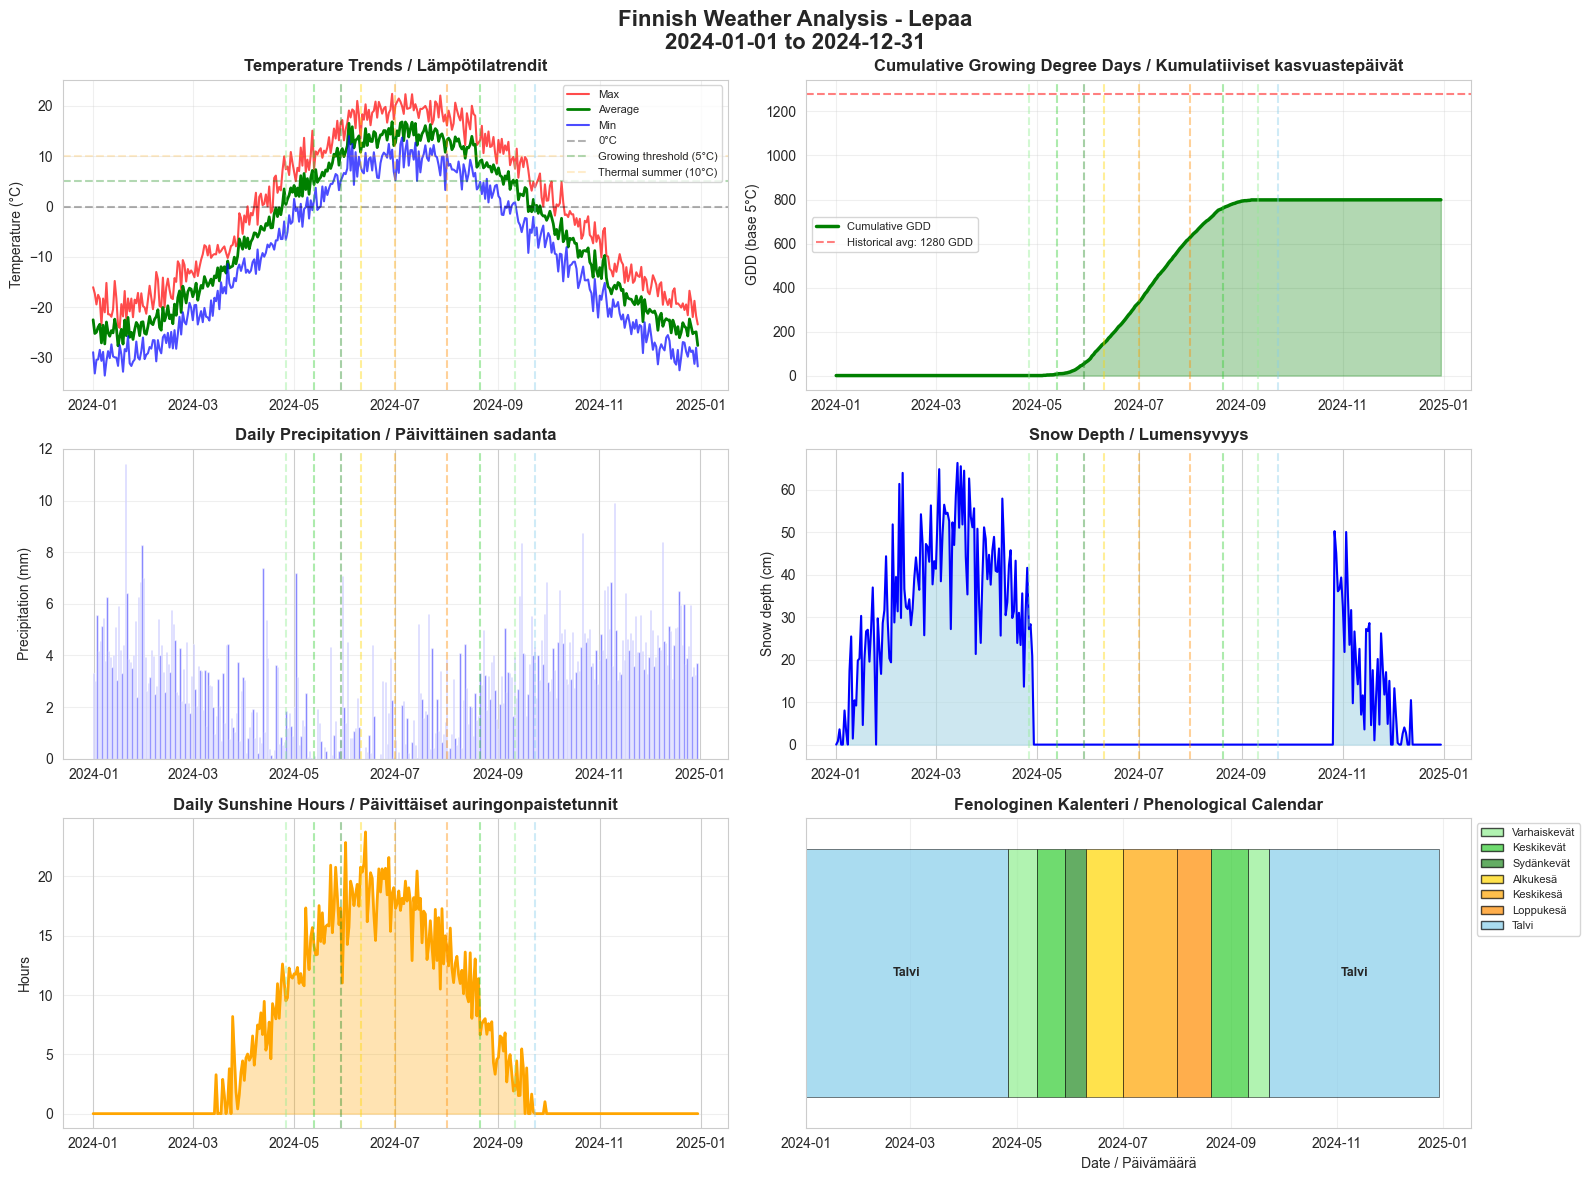


🗓️ Fenologiset vuodenaikojen vaihdokset / Phenological Season Transitions:
   26.04.2024: Varhaiskevät
   13.05.2024: Keskikevät
   29.05.2024: Sydänkevät
   10.06.2024: Alkukesä
   01.07.2024: Keskikesä
   01.08.2024: Loppukesä
   21.08.2024: Keskikevät
   11.09.2024: Varhaiskevät
   23.09.2024: Talvi

✅ Visualizations created with phenological calendar markers
   Katkoviivat näyttävät vuodenaikojen vaihtumisen
   Dashed lines show phenological season transitions


In [10]:
# ============================================================================
# Weather Visualization with Phenological Calendar Events
# ============================================================================

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle(
    f"Finnish Weather Analysis - {selected_station['name']}\n{start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}",
    fontsize=16,
    fontweight="bold",
)

# Helper function to add phenological season markers to charts
def add_phenological_markers(ax, weather_data, finnish_calendar_events):
    """Add vertical lines and labels for phenological season transitions"""
    season_transitions = []
    prev_season = None
    
    for date in weather_data.index:
        season_key, season_info = identify_phenological_season(date, weather_data, finnish_calendar_events)
        if season_key != prev_season and prev_season is not None:
            season_transitions.append({
                'date': date,
                'season': season_info['name'].split(' / ')[0],  # Get Finnish name
                'color': {
                    'early_spring': '#90EE90',
                    'mid_spring': '#32CD32',
                    'late_spring': '#228B22',
                    'early_summer': '#FFD700',
                    'mid_summer': '#FFA500',
                    'late_summer': '#FF8C00',
                    'early_autumn': '#CD853F',
                    'late_autumn': '#8B4513',
                    'winter': '#87CEEB'
                }.get(season_key, '#808080')
            })
        prev_season = season_key
    
    # Add vertical lines for season transitions
    for trans in season_transitions:
        ax.axvline(x=trans['date'], color=trans['color'], linestyle='--', alpha=0.4, linewidth=1.5)
    
    return season_transitions

# 1. Temperature trends with phenological markers
ax1 = axes[0, 0]
ax1.plot(weather_data.index, weather_data["temp_max"], "r-", alpha=0.7, label="Max", linewidth=1.5)
ax1.plot(weather_data.index, weather_data["temp_avg"], "g-", label="Average", linewidth=2)
ax1.plot(weather_data.index, weather_data["temp_min"], "b-", alpha=0.7, label="Min", linewidth=1.5)
ax1.axhline(y=0, color="black", linestyle="--", alpha=0.3, label="0°C")
ax1.axhline(y=5, color="green", linestyle="--", alpha=0.3, label="Growing threshold (5°C)")
ax1.axhline(y=10, color="orange", linestyle="--", alpha=0.2, label="Thermal summer (10°C)")

# Add phenological season markers
season_transitions = add_phenological_markers(ax1, weather_data, finnish_calendar_events)

ax1.set_title("Temperature Trends / Lämpötilatrendit", fontweight='bold')
ax1.set_ylabel("Temperature (°C)")
ax1.legend(loc='best', fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. Cumulative GDD with phenological markers
ax2 = axes[0, 1]
ax2.plot(weather_data.index, weather_data["gdd_cumulative"], "g-", linewidth=2.5, label="Cumulative GDD")
ax2.fill_between(
    weather_data.index, weather_data["gdd_cumulative"], alpha=0.3, color="green"
)

# Add phenological season markers
add_phenological_markers(ax2, weather_data, finnish_calendar_events)

# Add historical comparison if enabled
if use_historical_comparison:
    ax2.axhline(y=selected_station['avg_gdd'], color='red', linestyle='--', 
                alpha=0.5, label=f"Historical avg: {selected_station['avg_gdd']} GDD")

ax2.set_title("Cumulative Growing Degree Days / Kumulatiiviset kasvuastepäivät", fontweight='bold')
ax2.set_ylabel("GDD (base 5°C)")
ax2.legend(loc='best', fontsize=8)
ax2.grid(True, alpha=0.3)

# 3. Precipitation with phenological markers
ax3 = axes[1, 0]
ax3.bar(weather_data.index, weather_data["precipitation_mm"], color="blue", alpha=0.6)

# Add phenological season markers
add_phenological_markers(ax3, weather_data, finnish_calendar_events)

ax3.set_title("Daily Precipitation / Päivittäinen sadanta", fontweight='bold')
ax3.set_ylabel("Precipitation (mm)")
ax3.grid(True, alpha=0.3, axis='y')

# 4. Snow depth with phenological markers
ax4 = axes[1, 1]
ax4.fill_between(
    weather_data.index, weather_data["snow_depth_cm"], alpha=0.6, color="lightblue"
)
ax4.plot(weather_data.index, weather_data["snow_depth_cm"], "b-", linewidth=1.5)

# Add phenological season markers
add_phenological_markers(ax4, weather_data, finnish_calendar_events)

ax4.set_title("Snow Depth / Lumensyvyys", fontweight='bold')
ax4.set_ylabel("Snow depth (cm)")
ax4.grid(True, alpha=0.3, axis='y')

# 5. Sunshine hours with phenological markers
ax5 = axes[2, 0]
ax5.plot(weather_data.index, weather_data["sunshine_hours"], "orange", linewidth=2)
ax5.fill_between(
    weather_data.index, weather_data["sunshine_hours"], alpha=0.3, color="orange"
)

# Add phenological season markers
add_phenological_markers(ax5, weather_data, finnish_calendar_events)

ax5.set_title("Daily Sunshine Hours / Päivittäiset auringonpaistetunnit", fontweight='bold')
ax5.set_ylabel("Hours")
ax5.grid(True, alpha=0.3, axis='y')

# 6. Phenological season timeline (new chart replacing temperature distribution)
ax6 = axes[2, 1]

# Create a timeline showing phenological seasons
season_colors = {
    'early_spring': '#90EE90',
    'mid_spring': '#32CD32',
    'late_spring': '#228B22',
    'early_summer': '#FFD700',
    'mid_summer': '#FFA500',
    'late_summer': '#FF8C00',
    'early_autumn': '#CD853F',
    'late_autumn': '#8B4513',
    'winter': '#87CEEB'
}

# Identify seasons for each day
season_timeline = []
for date in weather_data.index:
    season_key, season_info = identify_phenological_season(date, weather_data, finnish_calendar_events)
    season_timeline.append(season_key)

# Plot season timeline as colored horizontal bar
unique_seasons = []
season_starts = []
season_ends = []
current_season = season_timeline[0]
current_start = weather_data.index[0]

for i, (date, season) in enumerate(zip(weather_data.index, season_timeline)):
    if season != current_season or i == len(season_timeline) - 1:
        unique_seasons.append(current_season)
        season_starts.append(current_start)
        season_ends.append(date)
        current_season = season
        current_start = date

# Plot as horizontal bars
y_pos = 0
for season, start, end in zip(unique_seasons, season_starts, season_ends):
    duration = (end - start).days
    ax6.barh(y_pos, duration, left=start, height=0.8, 
             color=season_colors.get(season, '#808080'), 
             alpha=0.7, edgecolor='black', linewidth=0.5)
    
    # Add label if segment is wide enough
    if duration > (weather_data.index[-1] - weather_data.index[0]).days * 0.1:
        mid_date = start + (end - start) / 2
        season_name = finnish_calendar_events[season]['name'].split(' / ')[0]
        ax6.text(mid_date, y_pos, season_name, 
                ha='center', va='center', fontsize=9, fontweight='bold')

ax6.set_title("Fenologinen Kalenteri / Phenological Calendar", fontweight='bold')
ax6.set_xlabel("Date / Päivämäärä")
ax6.set_yticks([])
ax6.set_ylim(-0.5, 0.5)
ax6.grid(True, alpha=0.3, axis='x')

# Add season legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.7, edgecolor='black') 
                   for season, color in season_colors.items() if season in season_timeline]
legend_labels = [finnish_calendar_events[season]['name'].split(' / ')[0] 
                for season in season_colors.keys() if season in season_timeline]
ax6.legend(legend_elements, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)

plt.tight_layout()
plt.show()

# Print season transition information
if season_transitions:
    print("\n🗓️ Fenologiset vuodenaikojen vaihdokset / Phenological Season Transitions:")
    print("=" * 70)
    for trans in season_transitions:
        print(f"   {trans['date'].strftime('%d.%m.%Y')}: {trans['season']}")

print("\n✅ Visualizations created with phenological calendar markers")
print("   Katkoviivat näyttävät vuodenaikojen vaihtumisen")
print("   Dashed lines show phenological season transitions")

## 💡 Vaihe 7: Suositukset / Step 7: Recommendations


In [11]:
# ============================================================================
# Horticultural Recommendations
# ============================================================================

# Generate recommendations based on analysis
recommendations = []

# Planting recommendations based on frost
if frost_stats["last_frost"]:
    safe_planting = frost_stats["last_frost"] + timedelta(days=14)
    recommendations.append(
        f"🌱 Turvallinen kylvöaika / Safe planting after: **{safe_planting.strftime('%Y-%m-%d')}** (2 weeks after last frost)"
    )

# GDD-based crop suggestions
total_gdd = weather_data["gdd_cumulative"].max()
if total_gdd > 1500:
    recommendations.append(
        "🌾 GDD >1500: Sopii / Suitable for warm-season crops (tomatoes, peppers)"
    )
elif total_gdd > 1000:
    recommendations.append(
        "🥬 GDD 1000-1500: Sopii / Suitable for cool-season crops (lettuce, cabbage)"
    )
else:
    recommendations.append(
        "🥶 GDD <1000: Rajoitettu kausi / Limited season, choose quick-maturing varieties"
    )

# Irrigation needs
if total_precip < 300:
    recommendations.append("💧 Sadanta <300mm: Kastelu tarpeen / Irrigation needed")
elif total_precip > 600:
    recommendations.append(
        "💧 Sadanta >600mm: Hyvä kosteus, seuraa kuivatusta / Good moisture, monitor drainage"
    )

# Frost protection
if frost_stats["frost_days"] > 0:
    recommendations.append(
        f"❄️ {frost_stats['frost_days']} hallapäivää / frost days: Suunnittele suojaus / Plan frost protection"
    )

display(
    Markdown(
        f"""## 💡 Puutarhasuositukset / Horticultural Recommendations

### Asema / Station: {selected_station['name']}
### Aikajakso / Period: {start_date.strftime('%Y-%m-%d')} - {end_date.strftime('%Y-%m-%d')}

{chr(10).join(['- ' + r for r in recommendations])}

### 📅 Tyypillinen kasvukausi Suomessa / Typical Growing Season in Finland

#### Etelä-Suomi / Southern Finland
- Kylvö sisällä / Indoor sowing: March-April
- Kylvö ulkona / Outdoor sowing: May (after last frost)
- Istutus / Transplanting: Late May - Early June
- Sadonkorjuu / Harvest: July-September

#### Keski-Suomi / Central Finland
- Kylvö sisällä / Indoor sowing: April
- Kylvö ulkona / Outdoor sowing: Late May - Early June
- Sadonkorjuu / Harvest: August-September

#### Pohjois-Suomi / Northern Finland
- Lyhyt kasvukausi / Short growing season: June-August
- Valitse nopeat lajikkeet / Choose quick-maturing varieties
- Kasvihuoneviljely suositeltavaa / Greenhouse recommended

### 🌡️ Kasvuastepäivät eri kasveille / GDD Requirements for Common Crops

| Kasvi / Crop | GDD | Huomiot / Notes |
|--------------|-----|-----------------|
| Salaatti / Lettuce | 400-800 | Viileä kausi / Cool season |
| Peruna / Potato | 1000-1400 | Suosittu Suomessa / Popular in Finland |
| Tomaatti / Tomato | 1200-2000 | Kasvihuone / Greenhouse recommended |
| Porkkana / Carrot | 900-1200 | Kestää viileää / Cold tolerant |
| Kurkku / Cucumber | 1000-1500 | Kasvihuone / Greenhouse best |
"""
    )
)

print("\n✅ Suositukset luotu / Recommendations generated")

## 💡 Puutarhasuositukset / Horticultural Recommendations

### Asema / Station: Lepaa
### Aikajakso / Period: 2024-01-01 - 2024-12-31

- 🌱 Turvallinen kylvöaika / Safe planting after: **2025-01-13** (2 weeks after last frost)
- 🥶 GDD <1000: Rajoitettu kausi / Limited season, choose quick-maturing varieties
- 💧 Sadanta >600mm: Hyvä kosteus, seuraa kuivatusta / Good moisture, monitor drainage
- ❄️ 245 hallapäivää / frost days: Suunnittele suojaus / Plan frost protection

### 📅 Tyypillinen kasvukausi Suomessa / Typical Growing Season in Finland

#### Etelä-Suomi / Southern Finland
- Kylvö sisällä / Indoor sowing: March-April
- Kylvö ulkona / Outdoor sowing: May (after last frost)
- Istutus / Transplanting: Late May - Early June
- Sadonkorjuu / Harvest: July-September

#### Keski-Suomi / Central Finland
- Kylvö sisällä / Indoor sowing: April
- Kylvö ulkona / Outdoor sowing: Late May - Early June
- Sadonkorjuu / Harvest: August-September

#### Pohjois-Suomi / Northern Finland
- Lyhyt kasvukausi / Short growing season: June-August
- Valitse nopeat lajikkeet / Choose quick-maturing varieties
- Kasvihuoneviljely suositeltavaa / Greenhouse recommended

### 🌡️ Kasvuastepäivät eri kasveille / GDD Requirements for Common Crops

| Kasvi / Crop | GDD | Huomiot / Notes |
|--------------|-----|-----------------|
| Salaatti / Lettuce | 400-800 | Viileä kausi / Cool season |
| Peruna / Potato | 1000-1400 | Suosittu Suomessa / Popular in Finland |
| Tomaatti / Tomato | 1200-2000 | Kasvihuone / Greenhouse recommended |
| Porkkana / Carrot | 900-1200 | Kestää viileää / Cold tolerant |
| Kurkku / Cucumber | 1000-1500 | Kasvihuone / Greenhouse best |



✅ Suositukset luotu / Recommendations generated


## 📚 Vaihe 8: Vienti ja lähteet / Step 8: Export & Citations


In [13]:
# ============================================================================
# Export Buttons - Interactive Export Options
# ============================================================================

import ipywidgets as widgets
from IPython.display import display, HTML
import os

# Create export buttons
export_html_btn = widgets.Button(
    description='📄 Export to HTML',
    button_style='success',
    tooltip='Export notebook as HTML with all visualizations',
    icon='file-code'
)

export_pdf_btn = widgets.Button(
    description='📑 Export to PDF',
    button_style='info',
    tooltip='Export notebook as PDF (requires nbconvert and LaTeX)',
    icon='file-pdf'
)

export_data_btn = widgets.Button(
    description='💾 Export Data CSV',
    button_style='primary',
    tooltip='Export weather data as CSV file',
    icon='download'
)

export_slides_btn = widgets.Button(
    description='🎬 Export Slides',
    button_style='warning',
    tooltip='Export as reveal.js presentation',
    icon='desktop'
)

output_area = widgets.Output()

# Button click handlers
def on_export_html_clicked(b):
    with output_area:
        output_area.clear_output()
        print("🔄 Exporting to HTML (results only, no code)...")
        # Export HTML without code cells using TemplateExporter
        result = os.system('jupyter nbconvert --to html --no-input finnish_weather_analysis.ipynb')
        if result == 0:
            print("✅ HTML export successful!")
            print("📁 File: finnish_weather_analysis.html")
            print("✨ Code cells are hidden - only results are shown")
        else:
            print("❌ HTML export failed. Make sure jupyter nbconvert is installed.")
            print("   Install with: pip install nbconvert")

def on_export_pdf_clicked(b):
    with output_area:
        output_area.clear_output()
        print("🔄 Exporting to PDF (results only, no code)...")
        print("⚠️ This requires LaTeX to be installed on your system.")
        print("📝 Configuring MiKTeX path for Windows...")
        
        # Add MiKTeX to PATH for this session
        miktex_paths = [
            r"C:\Program Files\MiKTeX\miktex\bin\x64",
            r"C:\Users\pekka\AppData\Local\Programs\MiKTeX\miktex\bin\x64",
            os.path.expanduser(r"~\AppData\Local\Programs\MiKTeX\miktex\bin\x64")
        ]
        
        current_path = os.environ.get('PATH', '')
        for miktex_path in miktex_paths:
            if os.path.exists(miktex_path) and miktex_path not in current_path:
                os.environ['PATH'] = miktex_path + os.pathsep + current_path
                print(f"✅ Added MiKTeX to PATH: {miktex_path}")
                break
        
        # Export PDF without code cells
        result = os.system('jupyter nbconvert --to pdf --no-input finnish_weather_analysis.ipynb')
        if result == 0:
            print("✅ PDF export successful!")
            print("📁 File: finnish_weather_analysis.pdf")
            print("✨ Code cells are hidden - only results are shown")
        else:
            print("❌ PDF export failed.")
            print("\n🔧 Troubleshooting LaTeX issues:")
            print("   1. Verify MiKTeX installation: Check if pdflatex.exe exists")
            print("      Default path: C:\\Program Files\\MiKTeX\\miktex\\bin\\x64\\")
            print("   2. Add MiKTeX to Windows PATH environment variable:")
            print("      - Open System Properties → Environment Variables")
            print("      - Edit PATH and add: C:\\Program Files\\MiKTeX\\miktex\\bin\\x64")
            print("   3. Restart Jupyter after changing PATH")
            print("   4. Or use HTML export instead (works without LaTeX)!")

def on_export_data_clicked(b):
    with output_area:
        output_area.clear_output()
        try:
            filename = f"finnish_weather_{selected_station['name'].replace(' ', '_')}_{start_date.strftime('%Y%m%d')}_to_{end_date.strftime('%Y%m%d')}.csv"
            weather_data.to_csv(filename)
            print(f"✅ Data exported successfully!")
            print(f"📁 File: {filename}")
            print(f"📊 Rows: {len(weather_data)}")
        except Exception as e:
            print(f"❌ Export failed: {e}")

def on_export_slides_clicked(b):
    with output_area:
        output_area.clear_output()
        print("🔄 Exporting to reveal.js slides (results only, no code)...")
        # Export slides without code cells
        result = os.system('jupyter nbconvert --to slides --no-input finnish_weather_analysis.ipynb')
        if result == 0:
            print("✅ Slides export successful!")
            print("📁 File: finnish_weather_analysis.slides.html")
            print("💡 Open in browser to view presentation")
            print("✨ Code cells are hidden - only results are shown")
        else:
            print("❌ Slides export failed. Make sure jupyter nbconvert is installed.")

# Connect buttons to handlers
export_html_btn.on_click(on_export_html_clicked)
export_pdf_btn.on_click(on_export_pdf_clicked)
export_data_btn.on_click(on_export_data_clicked)
export_slides_btn.on_click(on_export_slides_clicked)

# Display buttons and output area
display(HTML("<h3>📤 Export Options / Vientivaihtoehdot</h3>"))
display(HTML("<p>Click a button to export the notebook in your preferred format:</p>"))
display(HTML("""
<div style="background-color: #e3f2fd; padding: 15px; border-radius: 5px; margin-bottom: 15px; border-left: 5px solid #2196F3;">
<b>✨ NEW: Results-Only Export</b><br>
All exports now <b>hide code cells</b> and show only results, charts, and analysis!<br>
Perfect for sharing with non-technical audiences.<br><br>
📖 For detailed instructions, see <code>EXPORT_GUIDE.md</code> or use <code>.\export_notebook.ps1</code> script.
</div>
"""))

button_box = widgets.HBox([export_html_btn, export_pdf_btn, export_data_btn, export_slides_btn])
display(button_box)
display(output_area)

# Also show manual commands for reference
display(HTML("""
<details>
<summary><b>💡 Manual Export Commands (click to expand)</b></summary>
<pre>
# Export to HTML (results only - NO CODE CELLS)
!jupyter nbconvert --to html --no-input finnish_weather_analysis.ipynb

# Export to PDF (results only - NO CODE CELLS, requires LaTeX)
!jupyter nbconvert --to pdf --no-input finnish_weather_analysis.ipynb

# Export to Slides (results only - NO CODE CELLS)
!jupyter nbconvert --to slides --no-input finnish_weather_analysis.ipynb

# Export WITH code cells (if you want to show code)
!jupyter nbconvert --to html finnish_weather_analysis.ipynb

# Export to Markdown
!jupyter nbconvert --to markdown --no-input finnish_weather_analysis.ipynb

# Export to Python script
!jupyter nbconvert --to python finnish_weather_analysis.ipynb
</pre>

<h4>🔧 LaTeX/MiKTeX Configuration for PDF Export</h4>
<p>If PDF export fails with "LaTeX not found", try these solutions:</p>
<ol>
<li><b>Verify MiKTeX installation:</b> Check if pdflatex.exe exists at:
   <code>C:\\Program Files\\MiKTeX\\miktex\\bin\\x64\\pdflatex.exe</code></li>
<li><b>Add to Windows PATH:</b>
   <ul>
   <li>Press Win+X → System → Advanced system settings → Environment Variables</li>
   <li>Under "System variables", select "Path" and click Edit</li>
   <li>Click New and add: <code>C:\\Program Files\\MiKTeX\\miktex\\bin\\x64</code></li>
   <li>Click OK and restart Jupyter</li>
   </ul>
</li>
<li><b>Alternative:</b> Run in terminal (after adding to PATH):
   <pre>jupyter nbconvert --to pdf --no-input finnish_weather_analysis.ipynb</pre>
</li>
<li><b>Or use HTML export instead</b> - works without LaTeX and looks great!</li>
</ol>

<h4>📋 What does --no-input do?</h4>
<p>The <code>--no-input</code> flag <b>hides all code cells</b> in the exported document, showing only:</p>
<ul>
<li>✅ Markdown text and titles</li>
<li>✅ Charts and visualizations</li>
<li>✅ Tables and data displays</li>
<li>✅ Output from print statements</li>
<li>❌ Code cells (hidden)</li>
</ul>
<p>This creates a clean, professional report perfect for sharing with non-technical audiences!</p>
</details>
"""))

<>:133: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
<>:133: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
C:\Users\pekka\AppData\Local\Temp\ipykernel_10424\3889181003.py:133: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
  📖 For detailed instructions, see <code>EXPORT_GUIDE.md</code> or use <code>.\export_notebook.ps1</code> script.


Output()

In [ ]:
# ============================================================================
# Export and Documentation
# ============================================================================

# Build export filename and save CSV
export_filename = f"finnish_weather_{selected_station['name'].replace(' ', '_')}_{start_date.strftime('%Y%m%d')}_to_{end_date.strftime('%Y%m%d')}.csv"
weather_data.to_csv(export_filename)
print(f"💾 Data viety / Data exported: {export_filename}")

# Prepare comprehensive analysis report
md_text = f"""
## 📊 Finnish Horticultural Weather Analysis Report
## 🇫🇮 Suomen puutarhaviljelyn sääanalyysi

---

### 📍 Analysis Details / Analyysin tiedot

**Station / Asema:** {selected_station['name']}  
**Location / Sijainti:** {selected_station['lat']:.2f}°N, {selected_station['lon']:.2f}°E  
**Period / Aikajakso:** {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}  
**Days Analyzed / Analysoituja päiviä:** {len(weather_data)}  
**Data Source / Tietolähde:** {"FMI Open Data" if not USE_SAMPLE_DATA else "Sample Data"}  
**Report Date / Raportin päivämäärä:** {datetime.now().strftime('%Y-%m-%d %H:%M')}

---

### 🌡️ Temperature Summary / Lämpötilayhteenveto

| Metric / Mittari | Value / Arvo |
|------------------|--------------|
| Average Temperature / Keskilämpötila | {weather_data['temp_avg'].mean():.1f}°C |
| Maximum Temperature / Maksimilämpötila | {weather_data['temp_max'].max():.1f}°C |
| Minimum Temperature / Minimilämpötila | {weather_data['temp_min'].min():.1f}°C |
| Days above 5°C / Päiviä yli 5°C | {(weather_data['temp_avg'] > 5).sum()} |
| Days above 10°C / Päiviä yli 10°C | {(weather_data['temp_avg'] > 10).sum()} |
| Days above 15°C / Päiviä yli 15°C | {(weather_data['temp_avg'] > 15).sum()} |

---

### 🌱 Growing Season / Kasvukausi

| Metric / Mittari | Value / Arvo |
|------------------|--------------|
| Season Start / Kausi alkaa | {season_stats['start'].strftime('%Y-%m-%d') if season_stats['start'] else 'N/A'} |
| Season End / Kausi päättyy | {season_stats['end'].strftime('%Y-%m-%d') if season_stats['end'] else 'N/A'} |
| Season Length / Kauden pituus | {season_stats['length_days']} days / päivää |
| Growing Degree Days (GDD) | {weather_data['gdd_cumulative'].max():.0f} (base 5°C) |
| Average Daily GDD / Keskimääräinen GDD/päivä | {weather_data['gdd'].mean():.1f} |

---

### ❄️ Frost Analysis / Halla-analyysi

| Metric / Mittari | Value / Arvo |
|------------------|--------------|
| Frost Days (< 0°C) / Hallapäiviä | {frost_stats['frost_days']} |
| Severe Frost Days (< -5°C) / Ankaria hallapäiviä | {frost_stats['severe_frost_days']} |
| First Frost / Ensimmäinen halla | {frost_stats['first_frost'].strftime('%Y-%m-%d') if frost_stats['first_frost'] else 'N/A'} |
| Last Frost / Viimeinen halla | {frost_stats['last_frost'].strftime('%Y-%m-%d') if frost_stats['last_frost'] else 'N/A'} |
| Frost-Free Period / Hallavapaa kausi | {(frost_stats['last_frost'] - frost_stats['first_frost']).days if frost_stats['first_frost'] and frost_stats['last_frost'] else 'N/A'} days |

---

### 💧 Precipitation / Sadanta

| Metric / Mittari | Value / Arvo |
|------------------|--------------|
| Total Precipitation / Sadanta yhteensä | {total_precip:.1f} mm |
| Average Daily / Keskiarvo päivässä | {avg_precip:.1f} mm |
| Rainy Days (>1mm) / Sateisia päiviä | {(weather_data['precipitation_mm'] > 1).sum()} |
| Heavy Rain Days (>10mm) / Runsassateisia päiviä | {(weather_data['precipitation_mm'] > 10).sum()} |
| Dry Days (<1mm) / Kuivia päiviä | {(weather_data['precipitation_mm'] < 1).sum()} |

---

### ☀️ Sunshine / Auringonpaiste

| Metric / Mittari | Value / Arvo |
|------------------|--------------|
| Total Sunshine Hours / Auringonpaiste yhteensä | {weather_data['sunshine_hours'].sum():.0f} hours / tuntia |
| Average Daily / Keskiarvo päivässä | {weather_data['sunshine_hours'].mean():.1f} hours / tuntia |
| Maximum Daily / Maksimi päivässä | {weather_data['sunshine_hours'].max():.1f} hours / tuntia |

---

### 🌾 Crop Recommendations / Viljelysuositukset

**Growing Degree Days:** {weather_data['gdd_cumulative'].max():.0f}

{'✅ **Suitable for warm-season crops** (tomatoes, peppers, cucumbers) - GDD >1500' if weather_data['gdd_cumulative'].max() > 1500 else '✅ **Suitable for cool-season crops** (lettuce, cabbage, carrots) - GDD 1000-1500' if weather_data['gdd_cumulative'].max() > 1000 else '⚠️ **Limited season** - Choose quick-maturing varieties - GDD <1000'}

**Safe planting date** (2 weeks after last frost): {(frost_stats['last_frost'] + timedelta(days=14)).strftime('%Y-%m-%d') if frost_stats['last_frost'] else 'N/A'}

**Irrigation recommendation:** {'Irrigation needed regularly (total precipitation < 300mm)' if total_precip < 300 else 'Good moisture, monitor drainage (total precipitation > 600mm)' if total_precip > 600 else 'Moderate irrigation may be needed'}

---

### 📁 Exported Files / Viedyt tiedostot

- **Data CSV:** `{export_filename}`
- **Full Report:** See cells above for complete analysis with visualizations

💡 **Tip:** To export this notebook as HTML with all visualizations, use:
```python
# In terminal or new cell:
!jupyter nbconvert --to html finnish_weather_analysis.ipynb
```

---

### 📚 Data Sources and Citations

**Ilmatieteen laitos (FMI) / Finnish Meteorological Institute**
- URL: https://www.ilmatieteenlaitos.fi
- Open Data Portal: https://www.ilmatieteenlaitos.fi/avoin-data-avattavat-aineistot
- WFS API: https://opendata.fmi.fi/wfs
- API Documentation: https://en.ilmatieteenlaitos.fi/open-data-manual
- License: Creative Commons Attribution 4.0 (CC BY 4.0)
- Citation: "Ilmatieteen laitos, {datetime.now().year}. Weather observations from {selected_station['name']} station."

**This Analysis / Tämä analyysi:**
> Botanical Colabs (2025). Finnish Horticultural Weather Analysis.  
> Based on FMI Open Data.  
> https://github.com/outobecca/botanical-colabs

**Additional Resources / Lisätietoja:**
- Luke (Luonnonvarakeskus): https://www.luke.fi
- Jokioinen Research Station: https://www.luke.fi/toimipaikat/jokioinen

---

### ⚖️ License / Lisenssi

- This notebook: MIT License
- FMI Data: CC BY 4.0
- Sample/simulated data: Public domain

### ⚠️ Disclaimer / Vastuuvapauslauseke

This analysis is for educational and planning purposes. Weather data may have gaps or inaccuracies. Always verify critical decisions with current forecasts and consult local agricultural extension services for specific advice.

**Tämä analyysi on tarkoitettu koulutus- ja suunnittelutarkoituksiin. Säädatassa voi olla aukkoja tai epätarkkuuksia. Tarkista aina kriittiset päätökset ajankohtaisista ennusteista ja ota yhteyttä paikallisiin maatalousneuvontapalveluihin.**

---

**End of Report / Raportin loppu**

📊 **All visualizations are available in Step 6 above**
"""

display(Markdown(md_text))

print("\n" + "=" * 70)
print("✅ Analyysi valmis! / Analysis complete!")
print("=" * 70)
print(f"📊 Yhteensä {len(weather_data)} päivän data analysoitu")
print(f"🇫🇮 Asema: {selected_station['name']}")
print(f"📁 Data CSV: {export_filename}")
print(f"🌡️ Keskilämpötila: {weather_data['temp_avg'].mean():.1f}°C")
print(f"🌱 Kasvuastepäivät: {weather_data['gdd_cumulative'].max():.0f}")
print(f"💧 Sadanta: {total_precip:.1f} mm")
print("=" * 70)
print("\n💡 To export as HTML with visualizations, run:")
print("   !jupyter nbconvert --to html finnish_weather_analysis.ipynb")
print("=" * 70)